<a href="https://colab.research.google.com/github/dryjins/study/blob/main/rtest-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터를 불러올 패키지
install.packages("keras")
library(keras)
# 시각화 패키지
library(ggplot2)
# 데이터 변환
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [4]:
# MNIST 데이터셋 로드
mnist <- dataset_mnist()

# 훈련 데이터와 테스트 데이터 분할
X_train <- mnist$train$x
y_train <- mnist$train$y
X_test <- mnist$test$x
y_test <- mnist$test$y

# 훈련 데이터와 테스트 데이터 크기 조정
X_train <- array_reshape(X_train, c(nrow(X_train), 28 * 28))  # 28x28 이미지를 784 픽셀 벡터로 변환
X_test <- array_reshape(X_test, c(nrow(X_test), 28 * 28))

# 데이터 스케일링 (0 ~ 1 사이 값으로 조정)
X_train <- X_train / 255
X_test <- X_test / 255

# 타겟 데이터 원-핫 인코딩
y_train <- to_categorical(y_train, 10)  # 10은 클래스 수 (0부터 9까지)
y_test <- to_categorical(y_test, 10)

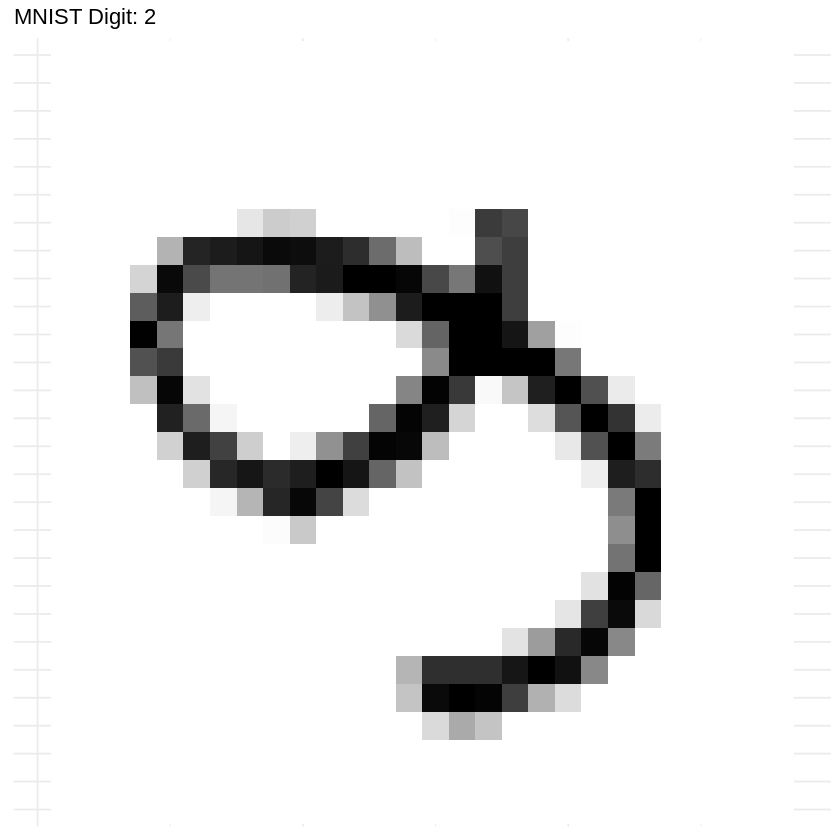

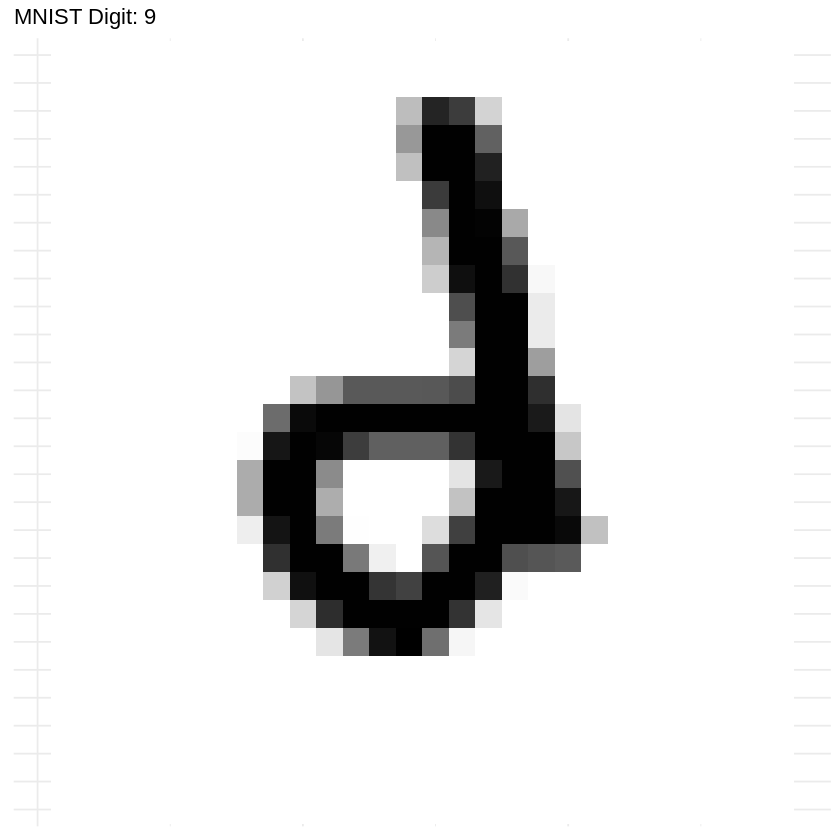

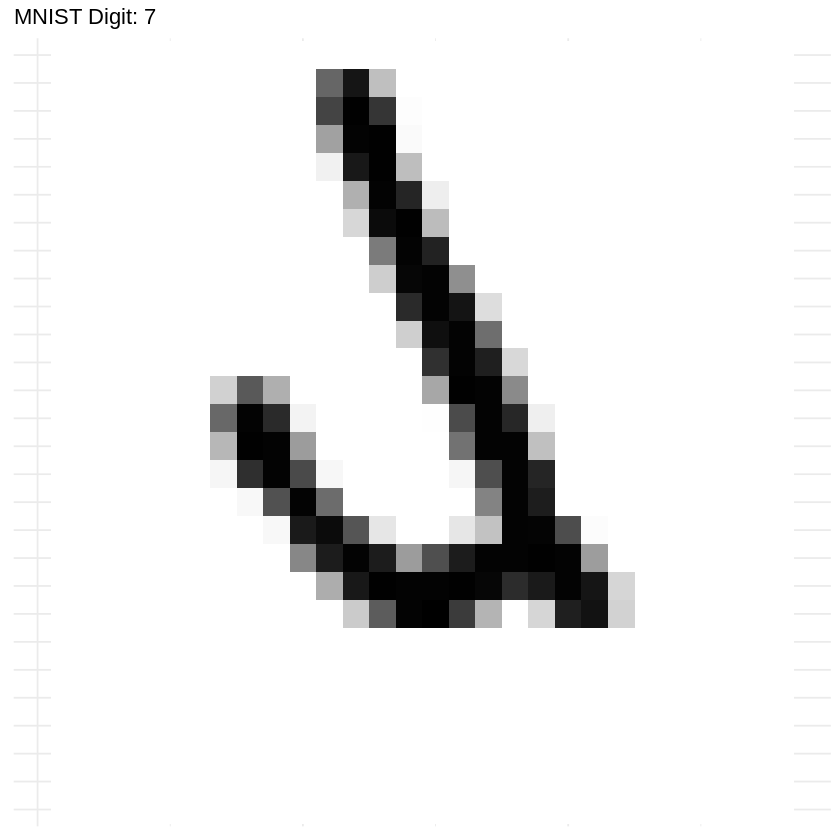

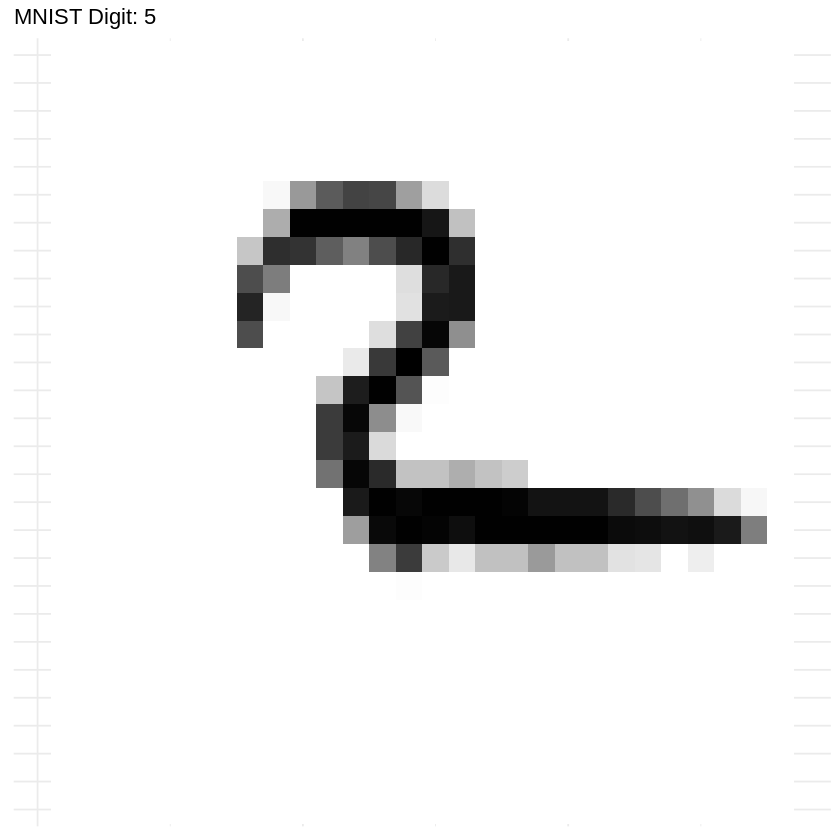

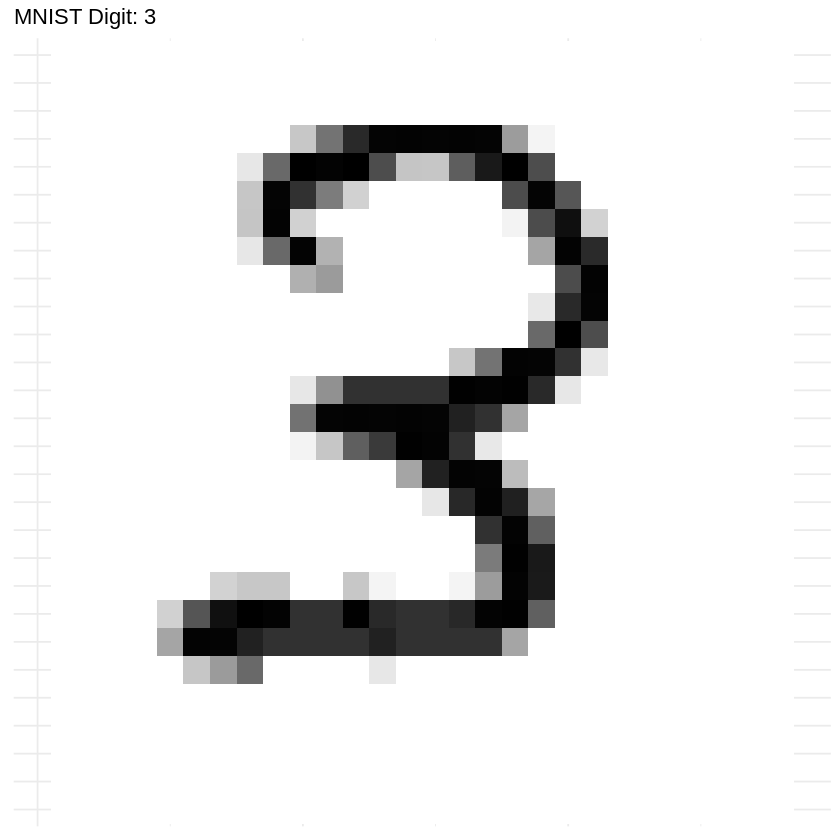

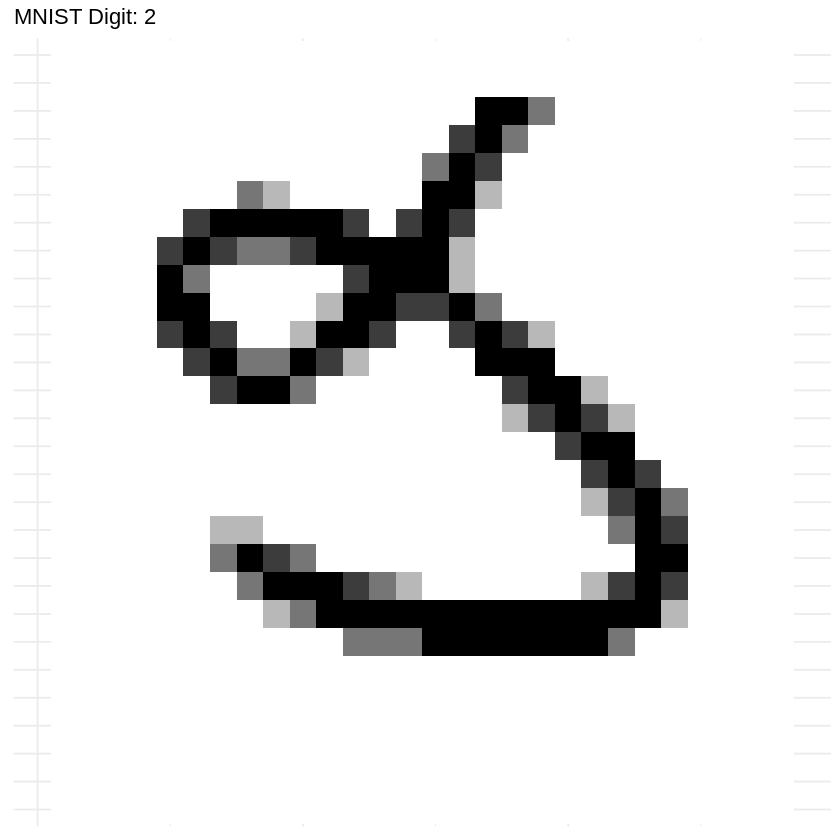

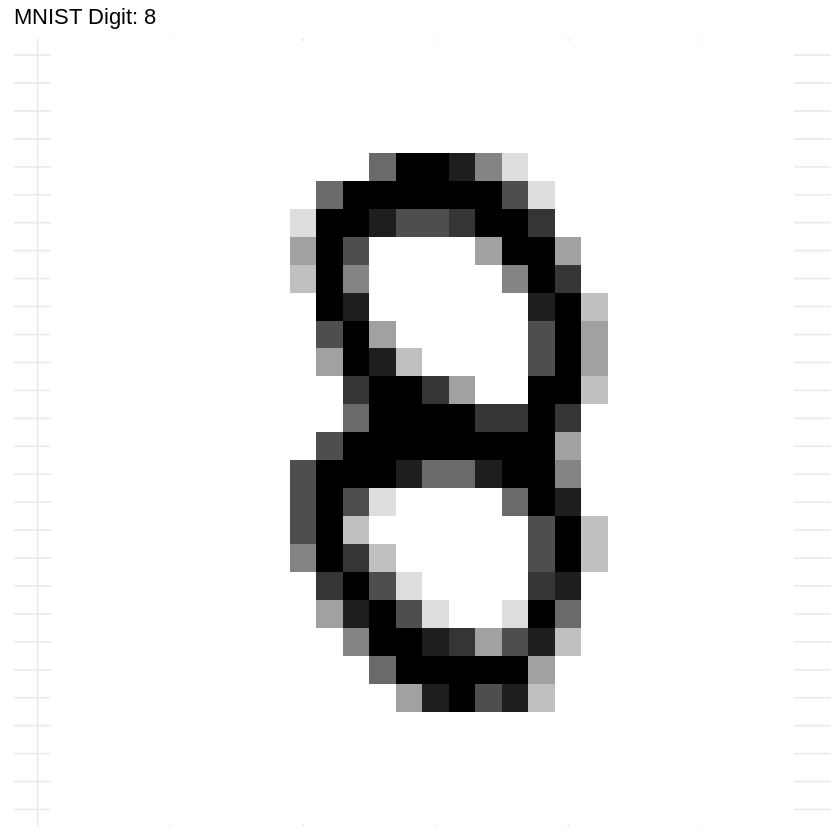

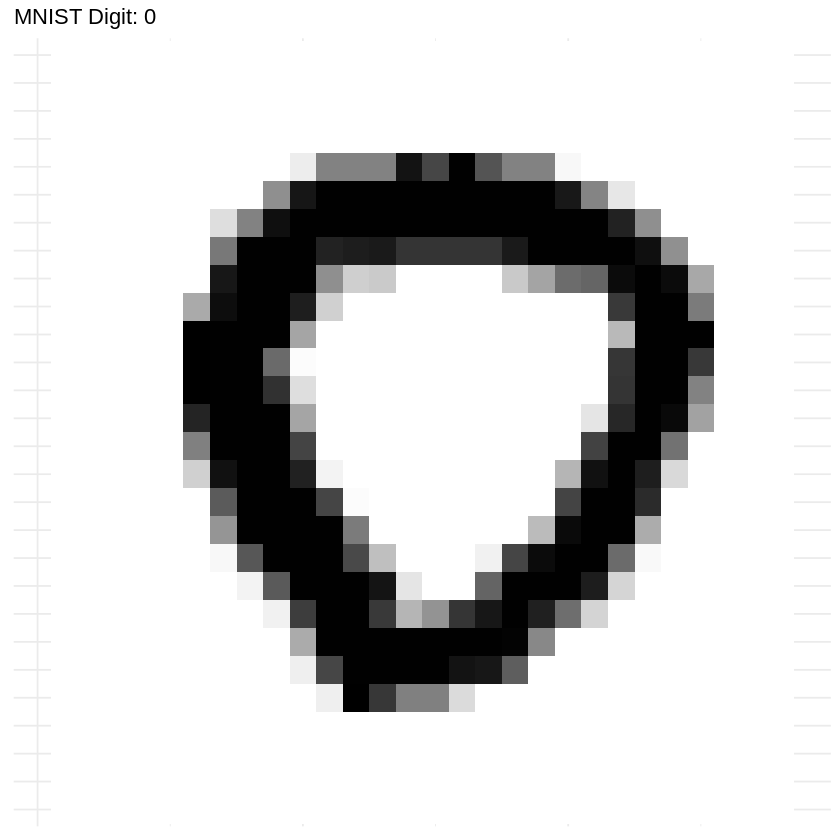

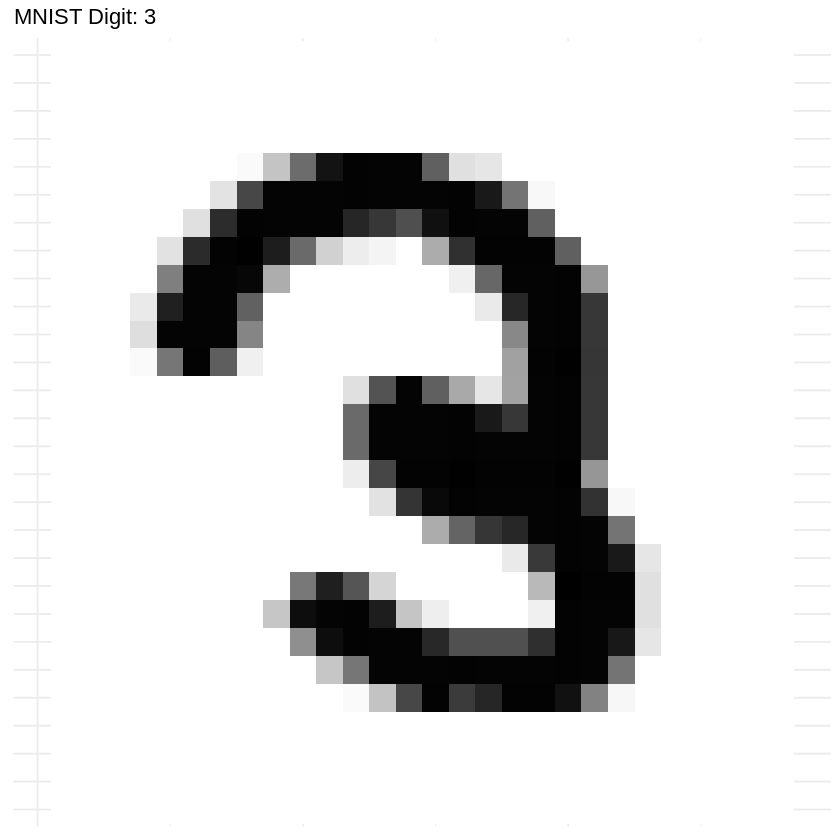

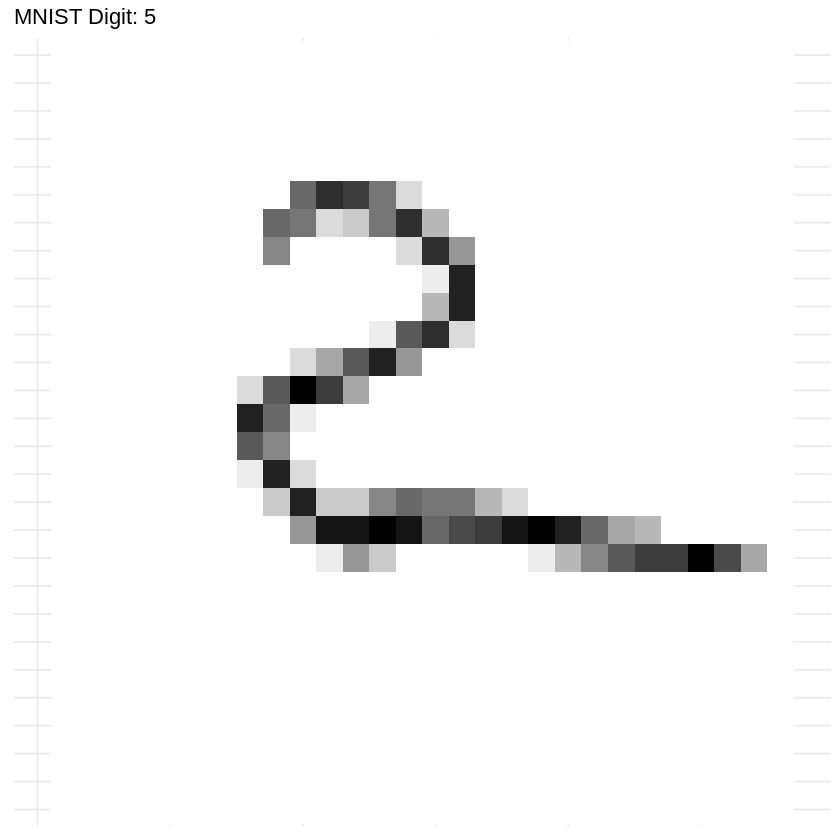

In [7]:
# 10개의 랜덤 샘플 인덱스 선택
sample_indices <- sample(1:nrow(X_train), 10)

# 선택한 이미지 시각화
par(mfrow = c(2, 5))  # 2x5 그래프 레이아웃 설정
for (i in 1:10) {
  sample_image <- X_train[sample_indices[i], ]
  sample_label <- which.max(y_train[sample_indices[i], ])  # 원-핫 인코딩을 다시 정수 레이블로 변환
  sample_image <- matrix(sample_image, nrow = 28, ncol = 28)  # 이미지 형태로 변환
  image_df <- as.data.frame(sample_image)
  image_df$row <- 1:nrow(image_df)
  image_df <- reshape2::melt(image_df, id.vars = "row")
  g = ggplot(image_df, aes(x = row, y = variable, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "black") +
    labs(title = paste("MNIST Digit:", sample_label-1), x = "", y = "") +
    theme_minimal() +
    theme(axis.text = element_blank(), axis.title = element_blank(), legend.position = "none")
    print(g)
}